In [0]:
!pip install -q tensorflow==2.1.0

     |████████████████████████████████| 421.8MB 37kB/s 
     |████████████████████████████████| 3.9MB 25.1MB/s 
     |████████████████████████████████| 450kB 41.2MB/s 
ERROR: tensorflow-probability 0.10.0rc0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.


In [0]:
import tensorflow as tf
print(tf.__version__)

2.1.0


In [0]:
import numpy as np
import matplotlib.pyplot as plt


In [0]:
mnist = tf.keras.datasets.mnist

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train, X_test = X_train /255.0, X_test/255.0
print("X_train.shape: ", X_train.shape)

11493376/11490434 [==============================] - 0s 0us/step
X_train.shape:  (60000, 28, 28)


In [0]:
# Build the model
model = tf.keras.models.Sequential([
              
              tf.keras.layers.Flatten(input_shape=(28, 28)),
              tf.keras.layers.Dense(128, activation='relu'),
              tf.keras.layers.Dropout(0.2),
              tf.keras.layers.Dense(10, activation='softmax')
])

In [0]:
# Compile the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [0]:
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 100us/sample - loss: 0.2963 - accuracy: 0.9135 - val_loss: 0.1361 - val_accuracy: 0.9604
Epoch 2/10
60000/60000 [==============================] - 5s 91us/sample - loss: 0.1402 - accuracy: 0.9585 - val_loss: 0.0981 - val_accuracy: 0.9707
Epoch 3/10
60000/60000 [==============================] - 5s 85us/sample - loss: 0.1057 - accuracy: 0.9681 - val_loss: 0.0852 - val_accuracy: 0.9739
Epoch 4/10
60000/60000 [==============================] - 5s 84us/sample - loss: 0.0866 - accuracy: 0.9734 - val_loss: 0.0810 - val_accuracy: 0.9758
Epoch 5/10
60000/60000 [==============================] - 5s 84us/sample - loss: 0.0745 - accuracy: 0.9768 - val_loss: 0.0711 - val_accuracy: 0.9788
Epoch 6/10
60000/60000 [==============================] - 5s 84us/sample - loss: 0.0656 - accuracy: 0.9794 - val_loss: 0.0650 - val_accuracy: 0.9798
Epoch 7/10
60000/60000 [==============================]

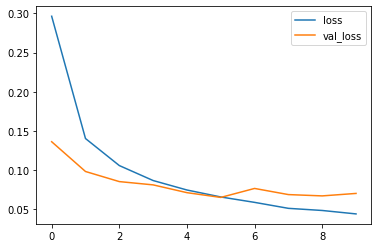

In [0]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

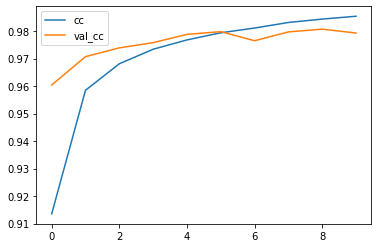

In [0]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='cc')
plt.plot(r.history['val_accuracy'], label='val_cc')
plt.legend()

In [0]:
# Evaluate the model
print(model.evaluate(X_test, y_test))

10000/10000 [==============================] - 0s 45us/sample - loss: 0.0701 - accuracy: 0.9793
[0.0701330638306099, 0.9793]


In [0]:
# Plot the confusion matrix
from sklearn.metrics import confusion_matrix

import numpy as np
import itertools

In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
  
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print('Normalized confusion matrix')

  else:
    print('Confusion matrix without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
    
  plt.tight_layout()
  plt.ylabel("True label")
  plt.xlabel("Predicted label")
  plt.show()

Confusion matrix without normalization
[[ 969    0    2    1    1    0    2    1    2    2]
 [   0 1126    4    0    0    0    1    0    4    0]
 [   1    3 1011    0    5    0    2    6    4    0]
 [   0    0    5  995    0    3    0    3    2    2]
 [   0    1    2    0  964    0    3    3    2    7]
 [   2    0    0   10    2  869    2    1    5    1]
 [   4    3    1    1    3    2  941    0    3    0]
 [   1    4    8    3    0    0    0 1006    2    4]
 [   3    1    3   12    2    4    1    4  943    1]
 [   1    2    0   13    8    4    0    7    5  969]]


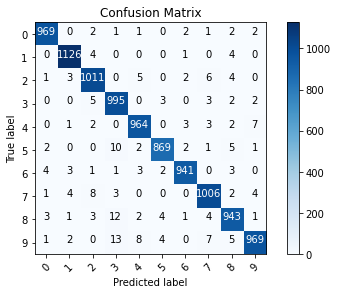

In [0]:
p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

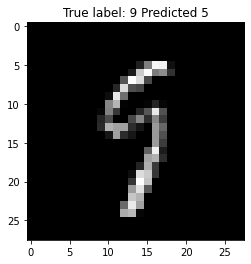

In [0]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i], cmap='gray')
plt.title("True label: %s Predicted %s" % (y_test[i], p_test[i]));